# Importing Agribalyse 3.1
This notebook shows how to import the Agribalyse 3.1 database in Brightway.

Agribalyse 3.1 has been developed by ADEME. It can be found in Brightway format [here](https://doc.agribalyse.fr/documentation-en/agribalyse-data/data-access) and more information can be found [here](https://doc.agribalyse.fr/documentation-en/).

_Gustave Coste - SustainCERT - 2022_

---------

## Importing the database

Creating a new project

In [1]:
import brightway2 as bw

bw.projects.set_current('Importing agribalyse3.1')
bw.bw2setup()

Creating default biosphere

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: ensure_categories_are_tuples
Applied 3 strategies in 0.00 seconds


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 09/26/2022 17:53:10
  Finished: 09/26/2022 17:53:11
  Total time elapsed: 00:00:00
  CPU %: 99.90
  Memory %: 1.17
Created database: biosphere3
Creating default LCIA methods

Applying strategy: normalize_units
Applying strategy: set_biosphere_type
Applying strategy: fix_ecoinvent_38_lcia_implementation
Applying strategy: drop_unspecified_subcategories
Applying strategy: link_iterable_by_fields
Applied 5 strategies in 1.18 seconds
Wrote 975 LCIA methods with 254388 characterization factors
Creating core data migrations



Importing the database

In [2]:
import os
bw.BW2Package.import_file(os.path.join(os.path.realpath(''), 'data', 'AGB31.bw2package'))

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 09/26/2022 18:03:56
  Finished: 09/26/2022 18:03:56
  Total time elapsed: 00:00:00
  CPU %: 66.50
  Memory %: 62.33


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:14:55


Title: Writing activities to SQLite3 database:
  Started: 09/26/2022 18:04:03
  Finished: 09/26/2022 18:18:59
  Total time elapsed: 00:14:55
  CPU %: 35.10
  Memory %: 65.25


[Brightway2 SQLiteBackend: agribalyse3.1 biosphere flows,
 Brightway2 SQLiteBackend: agribalyse3.1]

In [3]:
bw.databases

Databases dictionary with 3 object(s):
	agribalyse3.1
	agribalyse3.1 biosphere flows
	biosphere3

Two databases have been imported:
- `agribalyse3.1 biosphere flows` contains biosphere flows that are used by `agribalyse3.1` and that are not present in `biosphere3`, brightway's default biosphere database.
- `agribalyse3.1` contains the activities with references to biosphere flows from `agribalyse3.1 biosphere flows` and `biosphere3`

In [4]:
len(bw.Database('agribalyse3.1 biosphere flows'))

1883

In [5]:
len(bw.Database('agribalyse3.1'))

18600

## Exploring the data

In [6]:
agb = bw.Database('agribalyse3.1')

__Warning:__ Agribalyse 3.1 uses elementary flows that does not exist in Brightway's default biosphere database `biosphere3`. Thus, the default LCIA methods will not take into account all the elementary flows. To fix this, ensure the LCIA method you use has characterization factors for the elementary flows in `agribalyse3.1 biosphere flows`.

In [7]:
act = next(x for x in agb if any(exchange for exchange in x.biosphere() if exchange.input['database'] == 'agribalyse3.1 biosphere flows'))
sorted([(x.input['database'], x.input['name']) for x in act.biosphere()])

[('agribalyse3.1 biosphere flows', 'Copper sulfate'),
 ('agribalyse3.1 biosphere flows', 'Copper sulfate'),
 ('agribalyse3.1 biosphere flows', 'Copper sulfate'),
 ('agribalyse3.1 biosphere flows', 'Copper sulfate'),
 ('agribalyse3.1 biosphere flows', 'Spinosad'),
 ('agribalyse3.1 biosphere flows', 'Spinosad'),
 ('biosphere3', 'Ammonia'),
 ('biosphere3', 'Dinitrogen monoxide'),
 ('biosphere3', 'Dinitrogen monoxide'),
 ('biosphere3', 'Nitrogen oxides'),
 ('biosphere3', 'Spinosad'),
 ('biosphere3', 'Spinosad'),
 ('biosphere3', 'Water, river')]

Some activities contained in `agribalyse3.1` have special metadata.

In [8]:
from pprint import pprint

act = next(x for x in agb if 'ciqual_code' in x)
pprint(act.as_dict())

{'Category type': 'material',
 'Comment': 'Inventory of AGRIBALYSE v3.1, 2022 (update to v3.1 in August 2022 '
            'by EVEA S.A.S Coopérative). See the complete description of '
            'AGRIBALYSE database.The overall DQR of this product is: 3.75 {P: '
            '4.87, TiR: 3.65, GR: 2.9, TeR: 3.6}',
 'DQR': {'GR': 2.9, 'P': 4.87, 'TeR': 3.6, 'TiR': 3.65, 'overall': 3.75},
 'Date': '15/04/2020',
 'Infrastructure': 'No',
 'Process identifier': 'Training000020187015521',
 'Status': 'Finished',
 'System description': 'AGRIBALYSE',
 'Type': 'Unit process',
 'ciqual_code': '20917',
 'code': '53355e06032837b0f7bebafa1fa8f732',
 'database': 'agribalyse3.1',
 'name': 'Tempeh, processed in FR | Ambient (long) | PP | No preparation | at '
         'consumer/FR [Ciqual code: 20917]',
 'packaging': 'PP',
 'preparation_mode': 'No preparation',
 'production amount': 1.0,
 'reference product': 'Tempeh, processed in FR | Ambient (long) | PP | No '
                      'preparation | at

Visualizing the distribution of Data Quality Ratings (DQR)

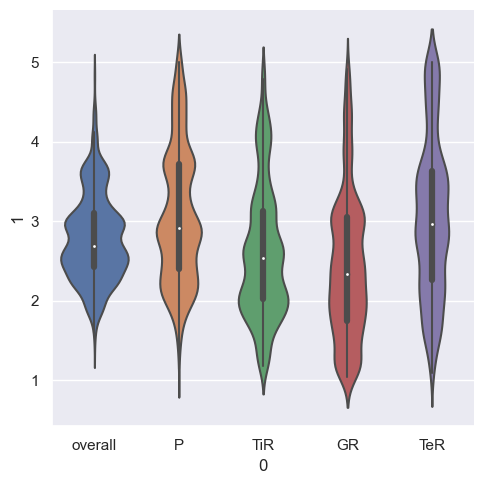

In [9]:
import pandas as pd
import seaborn as sns

sns.set()

df = pd.DataFrame([(k,  float(v)) for x in agb if 'DQR' in x for k, v in x['DQR'].items()])

sns.catplot(data=df, x=0, y=1, kind="violin")